In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

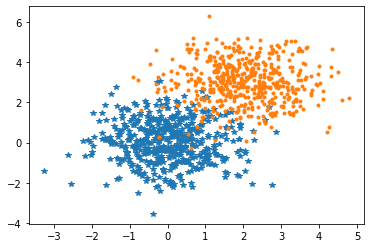

In [2]:
c1 = [0,0]
c2 = [2,3]
n = 500 
class1 = np.matlib.repmat(c1,n,1) + np.random.randn(n,len(c1))
class2 = np.matlib.repmat(c2,n,1) + np.random.randn(n,len(c2))
D = np.append(class1,class2,axis =0)

Data = np.concatenate((D, np.ones((2*n,1))),axis = 1).T

label = np.concatenate((np.ones((n,1)),-1*np.ones((n,1))),axis = 0)
y = label.T
plt.plot(class1[:,0],class1[:,1],'*',class2[:,0],class2[:,1],'.')
plt.show()

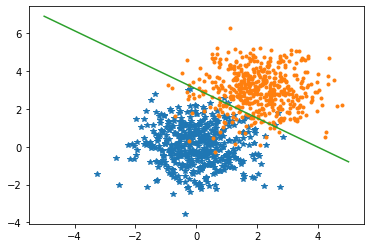

In [3]:
def prediction(w, Data):
    pred = []
    z = np.dot(w,Data)
    a = (1/(1+np.exp(-z)))
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred
learning_rate = 0.1
rand = np.random.randn(1,3)
for i in range(1,1500):
    z = np.dot(rand,Data)
    y_prediction = prediction(rand, Data)
    val = -np.multiply(y,z)
    J = np.sum(np.log(1+np.exp(val)))
    num = -np.multiply(y,np.exp(val))
    den = 1+np.exp(val)
    f = num/den
    grad = np.dot(Data,f.T)
    rand = rand - learning_rate*grad.T
Test_predict = prediction(rand, Data)
x =  np.linspace(-5,5,100)
xx = -(rand[0,0]/rand[0,1])*x - (rand[0,2]/rand[0,1])
plt.plot(class1[:,0],class1[:,1],'*',class2[:,0],class2[:,1],'.')
plt.plot(x,xx)
plt.show()

In [4]:
print("Accuracy",np.mean(y[0]==Test_predict)*100)

Accuracy 93.7
